In [ ]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
!conda install -c conda-forge textblob

/bin/bash: conda: command not found


In [ ]:
from textblob import TextBlob

# Import Data

In [ ]:
df=pd.read_csv('/content/drive/My Drive/datasets/india-news-headlines.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = df[(df['headline_category']=='business.international-business')].reset_index()
df2 = df[(df['headline_category']=='business.india-business')].reset_index()
df3 = df[(df['headline_category']=='business.mf-simplified.mf-news')].reset_index()
df4 = df[(df['headline_category']=='business.mf-simplified.jargon-busters.equity')].reset_index()
df5 = df[(df['headline_category']=='business.mf-simplified.jargon-busters.debt')].reset_index()

In [ ]:
for categories in df['headline_category'].unique():
  print(categories)

sports.wwe
unknown
entertainment.hindi.bollywood
india
city.bengaluru
city.patna
business.india-business
entertainment.english.hollywood
city.delhi
edit-page
sports.cricket.india-domestic.ranji-trophy
sports.football
only-in-america
city.ahmedabad
jugular-vein
swaminomics
city.thiruvananthapuram
city.pune
home.science
city.mumbai
city.chandigarh
city.lucknow
city.kolkata
city.hyderabad
cricket
business.international-business
city
removed
home.sunday-times.deep-focus
bombay-times
home.sunday-times.all-that-matters
home.education
pune-times
calcutta-times
hyderabad-times
bangalore-times
delhi-times
lucknow-times
ahmedabad-times
citizens-grievances
anti-terror-law
hyderabad.local-sports
sports.cricket.sri-lanka-in-india
sports.hockey
blogs
home.sunday-times
food-facts
recipes
business
ayodhya-imbroglio
afghan-children
astrology.horoscope
world.us
world.middle-east
gadgets-news
sports.off-the-field
world.europe
city.chennai
world.china
world.pakistan
life-style.events
sino-indian-ties
news

In [ ]:
df_clean = pd.concat([df1,df2,df3,df4,df5], axis=0)

In [ ]:
df_clean=df_clean.groupby(['publish_date','headline_category'])['headline_text'].apply(lambda x: '.'.join(x.astype(str))).reset_index()

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10702 entries, 0 to 10701
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   publish_date       10702 non-null  int64 
 1   headline_category  10702 non-null  object
 2   headline_text      10702 non-null  object
dtypes: int64(1), object(2)
memory usage: 251.0+ KB


In [ ]:
df_clean.head()

,publish_date,headline_category,headline_text
0,20010104,business.india-business,Car dealers caught in Bihar sales tax ruling
1,20010522,business.india-business,Re-negotiation best: Deshmukh; lenders' SOS to...
2,20010528,business.india-business,Auto body drives in new classification norms.A...
3,20010529,business.india-business,Ashok Leyland to cut jobs; divisions.'Fixing o...
4,20010530,business.india-business,Beware; the snoopware is watching you!.IA dive...


In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sentence = "you are cute "
sid.polarity_scores(sentence)

{'compound': 0.4588, 'neg': 0.0, 'neu': 0.4, 'pos': 0.6}

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
f = lambda title: TextBlob(title).sentiment[0]
df_clean['polarity'] = df_clean['headline_text'].apply(f)
df_clean['publish_date'] = pd.to_datetime(df_clean['publish_date'], format='%Y%m%d')


In [ ]:
f = lambda title: sid.polarity_scores(title)['neg']
df_clean['neg'] = df_clean['headline_text'].apply(f)

In [ ]:
f = lambda title: sid.polarity_scores(title)['neu']
df_clean['neu'] = df_clean['headline_text'].apply(f)

In [ ]:
f = lambda title: sid.polarity_scores(title)['pos']
df_clean['pos'] = df_clean['headline_text'].apply(f)

In [ ]:
f = lambda title: TextBlob(title).sentiment[1]
df_clean['subjectivity'] = df_clean['headline_text'].apply(f)

In [ ]:
df_clean.rename(columns={'publish_date':'Date'}, inplace = True)

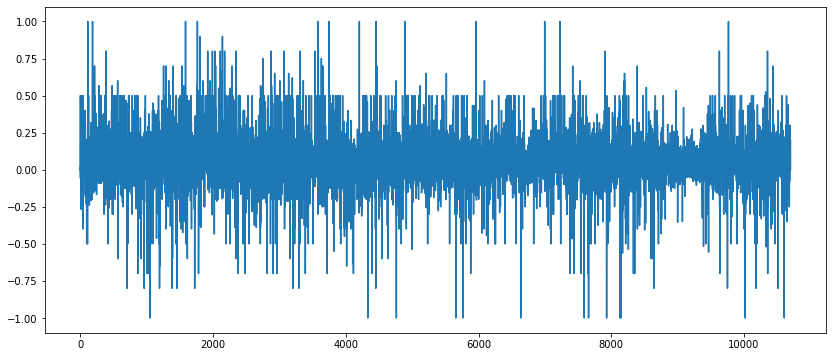

In [ ]:
df_clean['polarity'].plot(figsize=(14,6))

In [ ]:
df_clean.head()

,Date,headline_category,headline_text,polarity,compound,neg,neu,pos,subjectivity
0,2001-01-04,business.india-business,Car dealers caught in Bihar sales tax ruling,0.000000,0.0000,0.000,1.000,0.000,0.000000
1,2001-05-22,business.india-business,Re-negotiation best: Deshmukh; lenders' SOS to...,0.500000,0.4767,0.045,0.864,0.091,0.150000
2,2001-05-28,business.india-business,Auto body drives in new classification norms.A...,0.186147,0.1680,0.050,0.886,0.064,0.481602
3,2001-05-29,business.india-business,Ashok Leyland to cut jobs; divisions.'Fixing o...,-0.053199,-0.8020,0.170,0.797,0.032,0.273906
4,2001-05-30,business.india-business,Beware; the snoopware is watching you!.IA dive...,0.019529,-0.3382,0.074,0.891,0.035,0.232997


In [ ]:
df_prices = pd.read_csv('/content/drive/My Drive/datasets/^BSESN (1).csv')

In [ ]:
df_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


In [ ]:
df_prices.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4864,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
4865,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
4866,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0
4867,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0
4868,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500.0


In [ ]:
df_prices.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4795.000000,4795.000000,4795.000000,4795.000000,4795.000000,4.795000e+03
mean,18034.262572,18143.666605,17890.044829,18013.912100,18013.912100,8.189135e+04
std,10823.411039,10859.925623,10757.958972,10804.676830,10804.676830,1.080816e+06
min,2621.889893,2682.590088,2594.870117,2600.120117,2600.120117,0.000000e+00
25%,8394.479981,8485.520020,8268.844726,8378.930176,8378.930176,9.200000e+03
50%,17438.679688,17530.789063,17294.740234,17425.710938,17425.710938,1.380000e+04
75%,26668.965821,26772.745118,26469.004883,26632.209961,26632.209961,2.080000e+04
max,42263.000000,42273.871094,41850.289063,41952.628906,41952.628906,3.181510e+07


In [ ]:
df_prices['Date'] = pd.to_datetime(df_prices['Date'], format='%Y-%m-%d')

In [ ]:
df_prices

In [ ]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4869 entries, 0 to 4868
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4869 non-null   object 
 1   Open       4795 non-null   float64
 2   High       4795 non-null   float64
 3   Low        4795 non-null   float64
 4   Close      4795 non-null   float64
 5   Adj Close  4795 non-null   float64
 6   Volume     4795 non-null   float64
dtypes: float64(6), object(1)
memory usage: 266.4+ KB


In [ ]:
merge = df_prices.merge(df_clean, how='inner', on='Date', left_index = False)

In [ ]:
merge.head()


,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text,polarity,compound,neg,neu,pos,subjectivity
0,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,business.india-business,Car dealers caught in Bihar sales tax ruling,0.000000,0.0000,0.000,1.000,0.000,0.000000
1,2001-05-22,3643.290039,3663.159912,3630.030029,3640.600098,3640.600098,0.0,business.india-business,Re-negotiation best: Deshmukh; lenders' SOS to...,0.500000,0.4767,0.045,0.864,0.091,0.150000
2,2001-05-28,3663.060059,3728.050049,3663.060059,3720.149902,3720.149902,0.0,business.india-business,Auto body drives in new classification norms.A...,0.186147,0.1680,0.050,0.886,0.064,0.481602
3,2001-05-29,3732.030029,3751.699951,3725.830078,3742.070068,3742.070068,0.0,business.india-business,Ashok Leyland to cut jobs; divisions.'Fixing o...,-0.053199,-0.8020,0.170,0.797,0.032,0.273906
4,2001-05-30,3745.570068,3759.959961,3653.310059,3662.040039,3662.040039,0.0,business.india-business,Beware; the snoopware is watching you!.IA dive...,0.019529,-0.3382,0.074,0.891,0.035,0.232997


In [ ]:
merge.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text,polarity,compound,neg,neu,pos,subjectivity
7459,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,business.india-business,IT stocks shrug off H-1B jitters.Finmin calls ...,-0.011111,-0.7717,0.104,0.873,0.023,0.281481
7460,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0,business.india-business,Truck firms look for new export markets to sel...,0.082973,0.9432,0.035,0.831,0.134,0.220491
7461,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,business.india-business,Preferential offers get more pricing options f...,0.150000,-0.4767,0.086,0.914,0.000,0.225000
7462,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,business.india-business,Techtonic Review: The OnePlus 8 and OnePlus 8 ...,0.114815,0.3089,0.000,0.970,0.030,0.596296
7463,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500.0,business.india-business,Solar plan to make Leh self-reliant hanging fi...,0.200000,0.1531,0.059,0.873,0.067,0.400000


In [ ]:
merge.corr()

,polarity,compound,neg,neu,pos,Open,High,Low,Close,Adj Close,Volume
polarity,1.000000,0.269874,-0.245617,0.008947,0.241735,-0.007192,-0.007008,-0.006622,-0.006554,-0.006554,-0.012023
compound,0.269874,1.000000,-0.497319,0.024207,0.481385,0.081174,0.081218,0.082115,0.081763,0.081763,0.004505
neg,-0.245617,-0.497319,1.000000,-0.669786,-0.139641,0.052699,0.052589,0.052096,0.052094,0.052094,0.018493
neu,0.008947,0.024207,-0.669786,1.000000,-0.641740,-0.089658,-0.089534,-0.089314,-0.089147,-0.089147,-0.023253
pos,0.241735,0.481385,-0.139641,-0.641740,1.000000,0.065077,0.065026,0.065242,0.065021,0.065021,0.011878
Open,-0.007192,0.081174,0.052699,-0.089658,0.065077,1.000000,0.999917,0.999878,0.999797,0.999797,0.099169
High,-0.007008,0.081218,0.052589,-0.089534,0.065026,0.999917,1.000000,0.999839,0.999902,0.999902,0.099076
Low,-0.006622,0.082115,0.052096,-0.089314,0.065242,0.999878,0.999839,1.000000,0.999904,0.999904,0.099225
Close,-0.006554,0.081763,0.052094,-0.089147,0.065021,0.999797,0.999902,0.999904,1.000000,1.000000,0.099125
Adj Close,-0.006554,0.081763,0.052094,-0.089147,0.065021,0.999797,0.999902,0.999904,1.000000,1.000000,0.099125


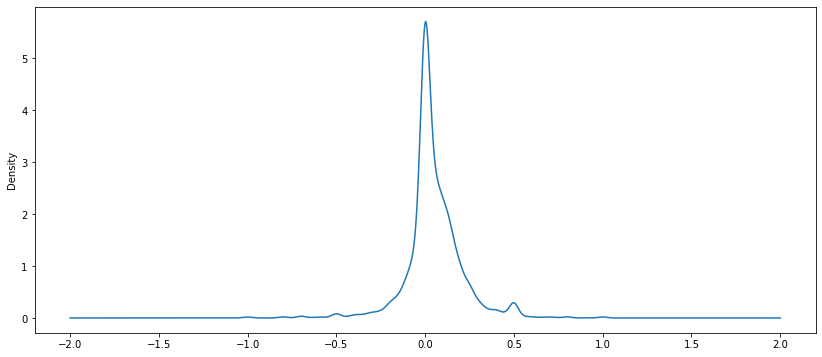

In [ ]:
df_clean['polarity'].plot(kind = 'density', figsize=(14,6))

In [ ]:
#f, ax = plt.subplots(1)
#df_prices.plot(kind='line', x='Date', y='Close', color='red', ax=ax)
#df_prices.plot(kind='line', x='Date', y=df_prices['Close'].rolling(window=30).mean(), color='blue', ax=ax)
#plt.show()


In [ ]:
merge.set_index('Date')

,headline_category,headline_text,polarity,compound,neg,neu,pos,subjectivity,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,
2001-01-04,business.india-business,Car dealers caught in Bihar sales tax ruling,0.000000,0.0000,0.000,1.000,0.000,0.000000,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
2001-05-22,business.india-business,Re-negotiation best: Deshmukh; lenders' SOS to...,0.500000,0.4767,0.045,0.864,0.091,0.150000,3643.290039,3663.159912,3630.030029,3640.600098,3640.600098,0.0
2001-05-28,business.india-business,Auto body drives in new classification norms.A...,0.186147,0.1680,0.050,0.886,0.064,0.481602,3663.060059,3728.050049,3663.060059,3720.149902,3720.149902,0.0
2001-05-29,business.india-business,Ashok Leyland to cut jobs; divisions.'Fixing o...,-0.053199,-0.8020,0.170,0.797,0.032,0.273906,3732.030029,3751.699951,3725.830078,3742.070068,3742.070068,0.0
2001-05-30,business.india-business,Beware; the snoopware is watching you!.IA dive...,0.019529,-0.3382,0.074,0.891,0.035,0.232997,3745.570068,3759.959961,3653.310059,3662.040039,3662.040039,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,business.india-business,IT stocks shrug off H-1B jitters.Finmin calls ...,-0.011111,-0.7717,0.104,0.873,0.023,0.281481,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
2020-06-25,business.india-business,Truck firms look for new export markets to sel...,0.082973,0.9432,0.035,0.831,0.134,0.220491,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
2020-06-26,business.india-business,Preferential offers get more pricing options f...,0.150000,-0.4767,0.086,0.914,0.000,0.225000,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0


In [ ]:
#merge_1 = merge.set_index('Date')

In [ ]:
merge.head()

,Date,headline_category,headline_text,polarity,compound,neg,neu,pos,subjectivity,Open,High,Low,Close,Adj Close,Volume
0,2001-01-04,business.india-business,Car dealers caught in Bihar sales tax ruling,0.000000,0.0000,0.000,1.000,0.000,0.000000,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
1,2001-05-22,business.india-business,Re-negotiation best: Deshmukh; lenders' SOS to...,0.500000,0.4767,0.045,0.864,0.091,0.150000,3643.290039,3663.159912,3630.030029,3640.600098,3640.600098,0.0
2,2001-05-28,business.india-business,Auto body drives in new classification norms.A...,0.186147,0.1680,0.050,0.886,0.064,0.481602,3663.060059,3728.050049,3663.060059,3720.149902,3720.149902,0.0
3,2001-05-29,business.india-business,Ashok Leyland to cut jobs; divisions.'Fixing o...,-0.053199,-0.8020,0.170,0.797,0.032,0.273906,3732.030029,3751.699951,3725.830078,3742.070068,3742.070068,0.0
4,2001-05-30,business.india-business,Beware; the snoopware is watching you!.IA dive...,0.019529,-0.3382,0.074,0.891,0.035,0.232997,3745.570068,3759.959961,3653.310059,3662.040039,3662.040039,0.0


In [ ]:
merge_1['Adj close_diff'] = merge_1['Adj Close'].diff()
#merge_1['polarity_diff2'] = merge_1['polarity_diff1'].diff()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
merge_1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text,polarity,compound,neg,neu,pos,subjectivity,Adj close_diff
7459,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,business.india-business,IT stocks shrug off H-1B jitters.Finmin calls ...,-0.011111,-0.7717,0.104,0.873,0.023,0.281481,-561.449219
7460,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0,business.india-business,Truck firms look for new export markets to sel...,0.082973,0.9432,0.035,0.831,0.134,0.220491,-26.878906
7461,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,business.india-business,Preferential offers get more pricing options f...,0.150000,-0.4767,0.086,0.914,0.000,0.225000,329.167968
7462,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,business.india-business,Techtonic Review: The OnePlus 8 and OnePlus 8 ...,0.114815,0.3089,0.000,0.970,0.030,0.596296,-209.750000
7463,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500.0,business.india-business,Solar plan to make Leh self-reliant hanging fi...,0.200000,0.1531,0.059,0.873,0.067,0.400000,-45.718750


In [ ]:
merge_1.corr()

,Open,High,Low,Close,Adj Close,Volume,polarity,compound,neg,neu,pos,subjectivity
Open,1.000000,0.999917,0.999878,0.999797,0.999797,0.099169,-0.007192,0.081174,0.052699,-0.089658,0.065077,0.089022
High,0.999917,1.000000,0.999839,0.999902,0.999902,0.099076,-0.007008,0.081218,0.052589,-0.089534,0.065026,0.088992
Low,0.999878,0.999839,1.000000,0.999904,0.999904,0.099225,-0.006622,0.082115,0.052096,-0.089314,0.065242,0.089099
Close,0.999797,0.999902,0.999904,1.000000,1.000000,0.099125,-0.006554,0.081763,0.052094,-0.089147,0.065021,0.088958
Adj Close,0.999797,0.999902,0.999904,1.000000,1.000000,0.099125,-0.006554,0.081763,0.052094,-0.089147,0.065021,0.088958
Volume,0.099169,0.099076,0.099225,0.099125,0.099125,1.000000,-0.012023,0.004505,0.018493,-0.023253,0.011878,0.001991
polarity,-0.007192,-0.007008,-0.006622,-0.006554,-0.006554,-0.012023,1.000000,0.270739,-0.244770,0.006607,0.243622,0.108588
compound,0.081174,0.081218,0.082115,0.081763,0.081763,0.004505,0.270739,1.000000,-0.496997,0.023121,0.481783,0.075629
neg,0.052699,0.052589,0.052096,0.052094,0.052094,0.018493,-0.244770,-0.496997,1.000000,-0.668595,-0.141185,0.071164
neu,-0.089658,-0.089534,-0.089314,-0.089147,-0.089147,-0.023253,0.006607,0.023121,-0.668595,1.000000,-0.641773,-0.135853


In [ ]:
label = []
for value in merge_1['Adj close_diff']:
  if value < 0:
    label.append(0)
  elif value >=0:
    label.append(1)
  else:
    label.append(1)
merge_1["label"] = label
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
merge_1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text,polarity,compound,neg,neu,pos,subjectivity,Adj close_diff,label
0,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,business.india-business,Car dealers caught in Bihar sales tax ruling,0.000000,0.0000,0.000,1.000,0.000,0.000000,NaN,1
1,2001-05-22,3643.290039,3663.159912,3630.030029,3640.600098,3640.600098,0.0,business.india-business,Re-negotiation best: Deshmukh; lenders' SOS to...,0.500000,0.4767,0.045,0.864,0.091,0.150000,-474.770019,0
2,2001-05-28,3663.060059,3728.050049,3663.060059,3720.149902,3720.149902,0.0,business.india-business,Auto body drives in new classification norms.A...,0.186147,0.1680,0.050,0.886,0.064,0.481602,79.549804,1
3,2001-05-29,3732.030029,3751.699951,3725.830078,3742.070068,3742.070068,0.0,business.india-business,Ashok Leyland to cut jobs; divisions.'Fixing o...,-0.053199,-0.8020,0.170,0.797,0.032,0.273906,21.920166,1
4,2001-05-30,3745.570068,3759.959961,3653.310059,3662.040039,3662.040039,0.0,business.india-business,Beware; the snoopware is watching you!.IA dive...,0.019529,-0.3382,0.074,0.891,0.035,0.232997,-80.030029,0


In [ ]:
keep_columns = ['Open','High','Low','Volume','subjectivity','polarity','compound','neg','neu','pos','label']
df_use = merge_1[keep_columns]

In [ ]:
#merge_1 = merge.dropna(axis = 0)
#merge_1.info()
df_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7361 entries, 0 to 7463
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          7361 non-null   float64
 1   High          7361 non-null   float64
 2   Low           7361 non-null   float64
 3   Volume        7361 non-null   float64
 4   subjectivity  7361 non-null   float64
 5   polarity      7361 non-null   float64
 6   compound      7361 non-null   float64
 7   neg           7361 non-null   float64
 8   neu           7361 non-null   float64
 9   pos           7361 non-null   float64
 10  label         7361 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 690.1 KB


,Open,High,Low,Volume,subjectivity,polarity,compound,neg,neu,pos,label


In [ ]:
# create feature dataset
x = df_use
x = np.array(x.drop(['label'], 1))
# create the target dataset
y = np.array(df_use['label'])
print(x.shape)
print(y.shape)

(7361, 10)
(7361,)


In [ ]:
#split the data into 80% training and 20% testing data set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [ ]:
#create and train the model
model = LinearDiscriminantAnalysis().fit(x_train, y_train)

In [ ]:
#model predictions
predictions = model.predict(x_test)

In [ ]:
#show the model metrics
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.26      0.37       431
           1       0.75      0.93      0.83      1042

    accuracy                           0.74      1473
   macro avg       0.68      0.60      0.60      1473
weighted avg       0.71      0.74      0.70      1473



# SCALING

In [ ]:
df_prices.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [ ]:
df_prices = df_prices.dropna(axis = 0).reset_index()
df_prices.tail()

,index,Date,Open,High,Low,Close,Adj Close,Volume
4790,4864,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
4791,4865,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
4792,4866,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0
4793,4867,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0
4794,4868,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500.0


In [ ]:
training_set=df_prices['Open']
training_set=pd.DataFrame(training_set)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled.shape

(4795, 1)

# DS WITH TIMESTEP=60, 1 OUTPUT

In [ ]:
import numpy as np
X_train = []
Y_train = []
for i in range(100, 3900):
    X_train.append(training_set_scaled[i-100:i, 0])
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)
print(Y_train.shape)

(3800, 100, 1)
(3800,)


In [ ]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Initialising the RNN
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
#df_prices.describe()

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
119/119 [==============================] - 15s 123ms/step - loss: 0.0078
Epoch 2/100
119/119 [==============================] - 15s 125ms/step - loss: 0.0018
Epoch 3/100
119/119 [==============================] - 15s 124ms/step - loss: 0.0015
Epoch 4/100
119/119 [==============================] - 15s 125ms/step - loss: 0.0013
Epoch 5/100
119/119 [==============================] - 15s 124ms/step - loss: 0.0013
Epoch 6/100
119/119 [==============================] - 15s 125ms/step - loss: 0.0011
Epoch 7/100
119/119 [==============================] - 15s 125ms/step - loss: 0.0011
Epoch 8/100
119/119 [==============================] - 15s 126ms/step - loss: 9.5653e-04
Epoch 9/100
119/119 [==============================] - 15s 127ms/step - loss: 9.9242e-04
Epoch 10/100
119/119 [==============================] - 15s 127ms/step - loss: 9.1018e-04
Epoch 11/100
119/119 [==============================] - 15s 125ms/step - loss: 9.2992e-04
Epoch 12/100
119/119 [=========================

In [ ]:
X_test=[]
for i in range(4001, 4795):
      X_test.append(training_set_scaled[i-100:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()
predicted_stock_price.index = pd.RangeIndex(start=4001, stop=4795, step=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 4001 to 4794
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       794 non-null    float32
dtypes: float32(1)
memory usage: 3.2 KB


In [ ]:
df_price_test=df_prices[4001:4795]
real_stock_price=df_price_test['Open']
real_stock_price.head()
df_price_test.tail()

,index,Date,Open,High,Low,Close,Adj Close,Volume
4790,4864,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
4791,4865,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
4792,4866,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0
4793,4867,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0
4794,4868,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500.0


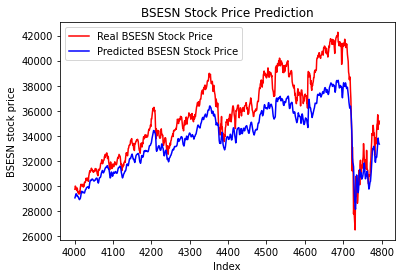

In [ ]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real BSESN Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted BSESN Stock Price')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Index')
plt.ylabel('BSESN stock price')
plt.legend()
plt.show()